# *Problem Statement* #
An education company named X Education sells online courses to industry professionals.Many professionals land on their website and browse the courses offered.nce these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. However the lead conversion rate is very poor , it is about 30%. The company wishes to improve the lead conversion rate and for this they want to identify the hot leads that would gaurantee them payment and increase in revenue. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#Supress the warnings
import warnings
warnings.filterwarnings("ignore")

#Importing libraries
import numpy as np
import pandas as pd

#importing visualisation library
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## Data Cleaning ##

### 1: Reading the data

In [2]:
## Reading the Leads.csv file in a dataframe called lead
lead=pd.read_csv("Leads.csv")

### 2: Inspecting the dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [4]:
# Check the number of rows and columns in the dataframe

lead.shape

(9240, 37)

In [5]:
# Check the column-wise info of the dataframe
lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check the summary for the numeric columns 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


### 3: Handling Null vlaues and Missing Values and EDA

In [7]:
#check the number of null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Create a dummy dataframe called duplicate_lead which is a copy of lead and check for duplicate  values 
duplicate_lead = lead
duplicate_lead.drop_duplicates(subset=None, inplace=True)

In [9]:
duplicate_lead.shape

(9240, 37)

- As the shape of duplicate_lead is same as original df lead , we can conclude that there are no duplicate rows.

####  From the data dictinoary , we know that few columns have a value 'select' which means that the customer did not select any option from the dropdown  list, hence it shows select, so we will treat these values as NULL and replace them with Nan.

In [10]:
#finding  the list of columns those have the value "select"

cols=['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

print("Column name containing value Select:\n")

for col in cols:
    for value in lead[col].values:
        if value == "Select":
            print(col)
            break

Column name containing value Select:

Specialization
How did you hear about X Education
Lead Profile
City


In [11]:
# replacing all 'Select' values with Nan
lead = lead.replace('Select', np.nan) 

In [12]:
#checking the null value percenatages for each column in lead df
(lead.isnull().mean()*100).sort_values(ascending = False)

How did you hear about X Education              78.4632
Lead Profile                                    74.1883
Lead Quality                                    51.5909
Asymmetrique Profile Score                      45.6494
Asymmetrique Activity Score                     45.6494
Asymmetrique Profile Index                      45.6494
Asymmetrique Activity Index                     45.6494
City                                            39.7078
Specialization                                  36.5801
Tags                                            36.2879
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
TotalVisits                                      1.4827
Page Views Per Visit                             1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Lead Origin                                     

In [13]:
#we will remove the columns with missing values higher than 45%

lead = lead.loc[:,lead.isnull().mean()<.45]


In [14]:
#checking the null value percenatages for each column in lead df
(lead.isnull().mean()*100).sort_values(ascending = False)

City                                            39.7078
Specialization                                  36.5801
Tags                                            36.2879
What matters most to you in choosing a course   29.3182
What is your current occupation                 29.1126
Country                                         26.6342
TotalVisits                                      1.4827
Page Views Per Visit                             1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Lead Number                                      0.0000
Lead Origin                                      0.0000
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
Total Time Spent on Website                      0.0000
Last Notable Activity                            0.0000
A free copy of Mastering The Interview          

#### After dropping the columns with missing values higher than 45% , we have 6 columns which around 25-40 percent of missing values , so we will impute them accordingly

#### Analyzing the categorical columns

In [15]:
#checking the different values and their counts for column 'Country'

lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Sweden                     3
Uganda                     2
Italy                      2
Philippines                2
Asia/Pacific Region        2
Netherlands                2
Ghana                      2
Belgium                    2
China                      2
Bangladesh                 2
Vietnam                    1
Sri Lanka                  1
Indonesia                  1
Denmark                    1
Kenya                      1
Russia        

In [16]:
#calculating mode as it is a categorical column 
lead.Country.mode()

0    India
dtype: object

In [17]:
#The mode for Country came out to be 'India' , so we will impute the Nan values with 'India'
lead['Country'] = lead['Country'].replace(np.nan,'India')


In [18]:
#checking the different values and their counts for column 'Country'

lead['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
China                      2
Italy                      2
Philippines                2
Bangladesh                 2
Belgium                    2
Ghana                      2
Netherlands                2
Uganda                     2
Tanzania                   1
Sri Lanka                  1
Indonesia                  1
Vietnam                    1
Denmark                    1
Kenya                      1
Liberia       

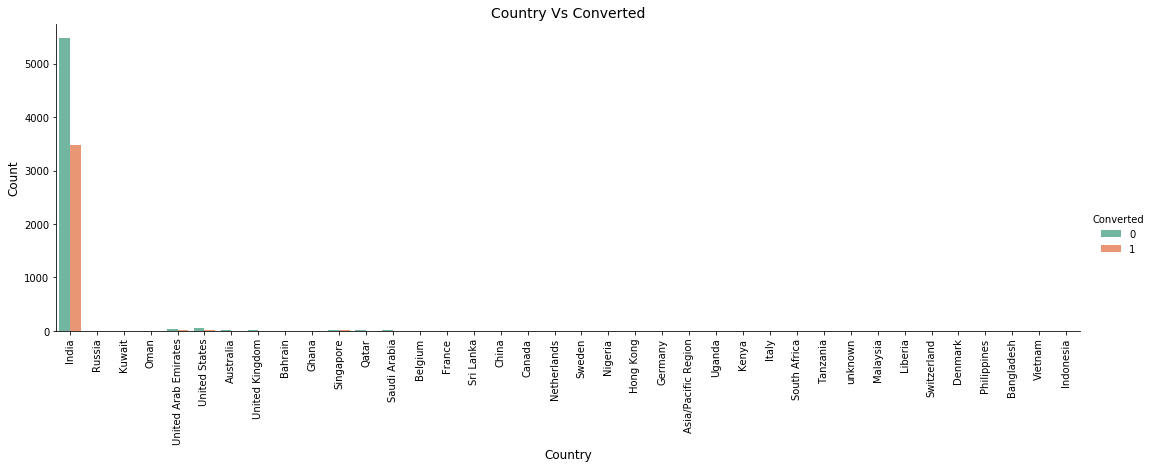

In [19]:
#plotting spread of Country columnn after replacing NaN values

#plt.figure(figsize=(15,5))
plot = sns.catplot(x="Country", hue = "Converted", kind="count", data=lead, palette="Set2",aspect= 3);
plt.title('Country Vs Converted', fontsize = 14)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

#### As seen above ,"India" has the highest for country column , and other countries have very low count, the data is  highly skewed. Hence we will drop column 'Country' for our analysis.


In [20]:
#checking the different values and their counts for column 'City'
lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
#calculating mode as it is a categorical column 
lead.City.mode()

0    Mumbai
dtype: object

In [22]:
#The mode for City came out to be 'Mumbai' , so we will impute the Nan values with 'Mumbai'
lead['City'] = lead['City'].replace(np.nan,'Mumbai')


In [23]:
lead['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Here the missing values are very high -  This column indicates what the customer has specialized in. There is a possibility that the applicable option to the customer was not available in the list so they could not choose a category/or they did not want to reveal it. We cannot simply impute the Nan's by finding mode , so we will create a separate category called 'Others' for filling the missing values

In [25]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

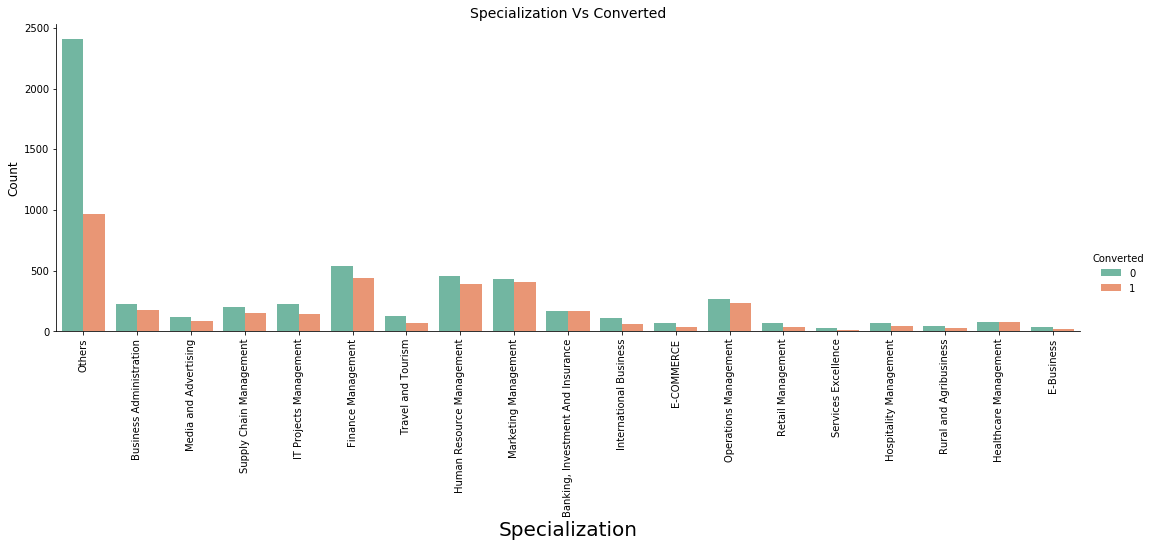

In [26]:
#plotting spread of Specialization columnn after replacing NaN values

#plt.figure(figsize=(15,5))
plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=lead, palette="Set2",aspect= 3);
plt.title('Specialization Vs Converted', fontsize = 14)
plt.xlabel("Specialization", fontsize = 20)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

- we observe that Majority of the customers have not specified their Specialization i.e the domain in which they have worked before , highest count is for 'Others'.

In [27]:
#checking value counts of Tags column

lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
lead['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [29]:
#replacing the nan value
lead["Tags"]=lead["Tags"].replace(np.NaN,"Will revert after reading the email")

In [30]:
#checking value counts of What matters most to you in choosing a course column 

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
lead['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [32]:
#replacing null  value
lead["What matters most to you in choosing a course"]=lead["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")

In [33]:
#checking value counts of What is your current occupation column 

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Here the missing values are  high -  This column Indicates whether the customer is a student, umemployed or employed etc. There is a possibility that they did not want to reveal it. We cannot simply impute the Nan's by finding mode , so we will create a separate category called 'Not specified' for filling the missing values

In [34]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Not specified')

In [35]:
#checking value counts of What is your current occupation column 

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
#checking the null value percenatages for each column in lead df
(lead.isnull().mean()*100).sort_values(ascending = False)

TotalVisits                                     1.4827
Page Views Per Visit                            1.4827
Last Activity                                   1.1147
Lead Source                                     0.3896
Last Notable Activity                           0.0000
A free copy of Mastering The Interview          0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
Total Time Spent on Website                     0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper 

- We are left with columns TotalVisits ,Page Views Per Visit,Last,Activity,Lead Source columns which have less than 2% of missing values , hence we will drop all the missing values

In [37]:
lead.dropna(inplace=True)

In [38]:
#checking the null value percenatages for each column in lead df
(lead.isnull().mean()*100).sort_values(ascending = False)

Last Notable Activity                           0.0000
A free copy of Mastering The Interview          0.0000
Lead Number                                     0.0000
Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     0.0000
Total Time Spent on Website                     0.0000
Page Views Per Visit                            0.0000
Last Activity                                   0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper 

In [39]:
lead.shape

(9074, 30)

####  After The missing value treatement , we have 9074 rows left in our dataset with 30 columns

#### Outlier treatment

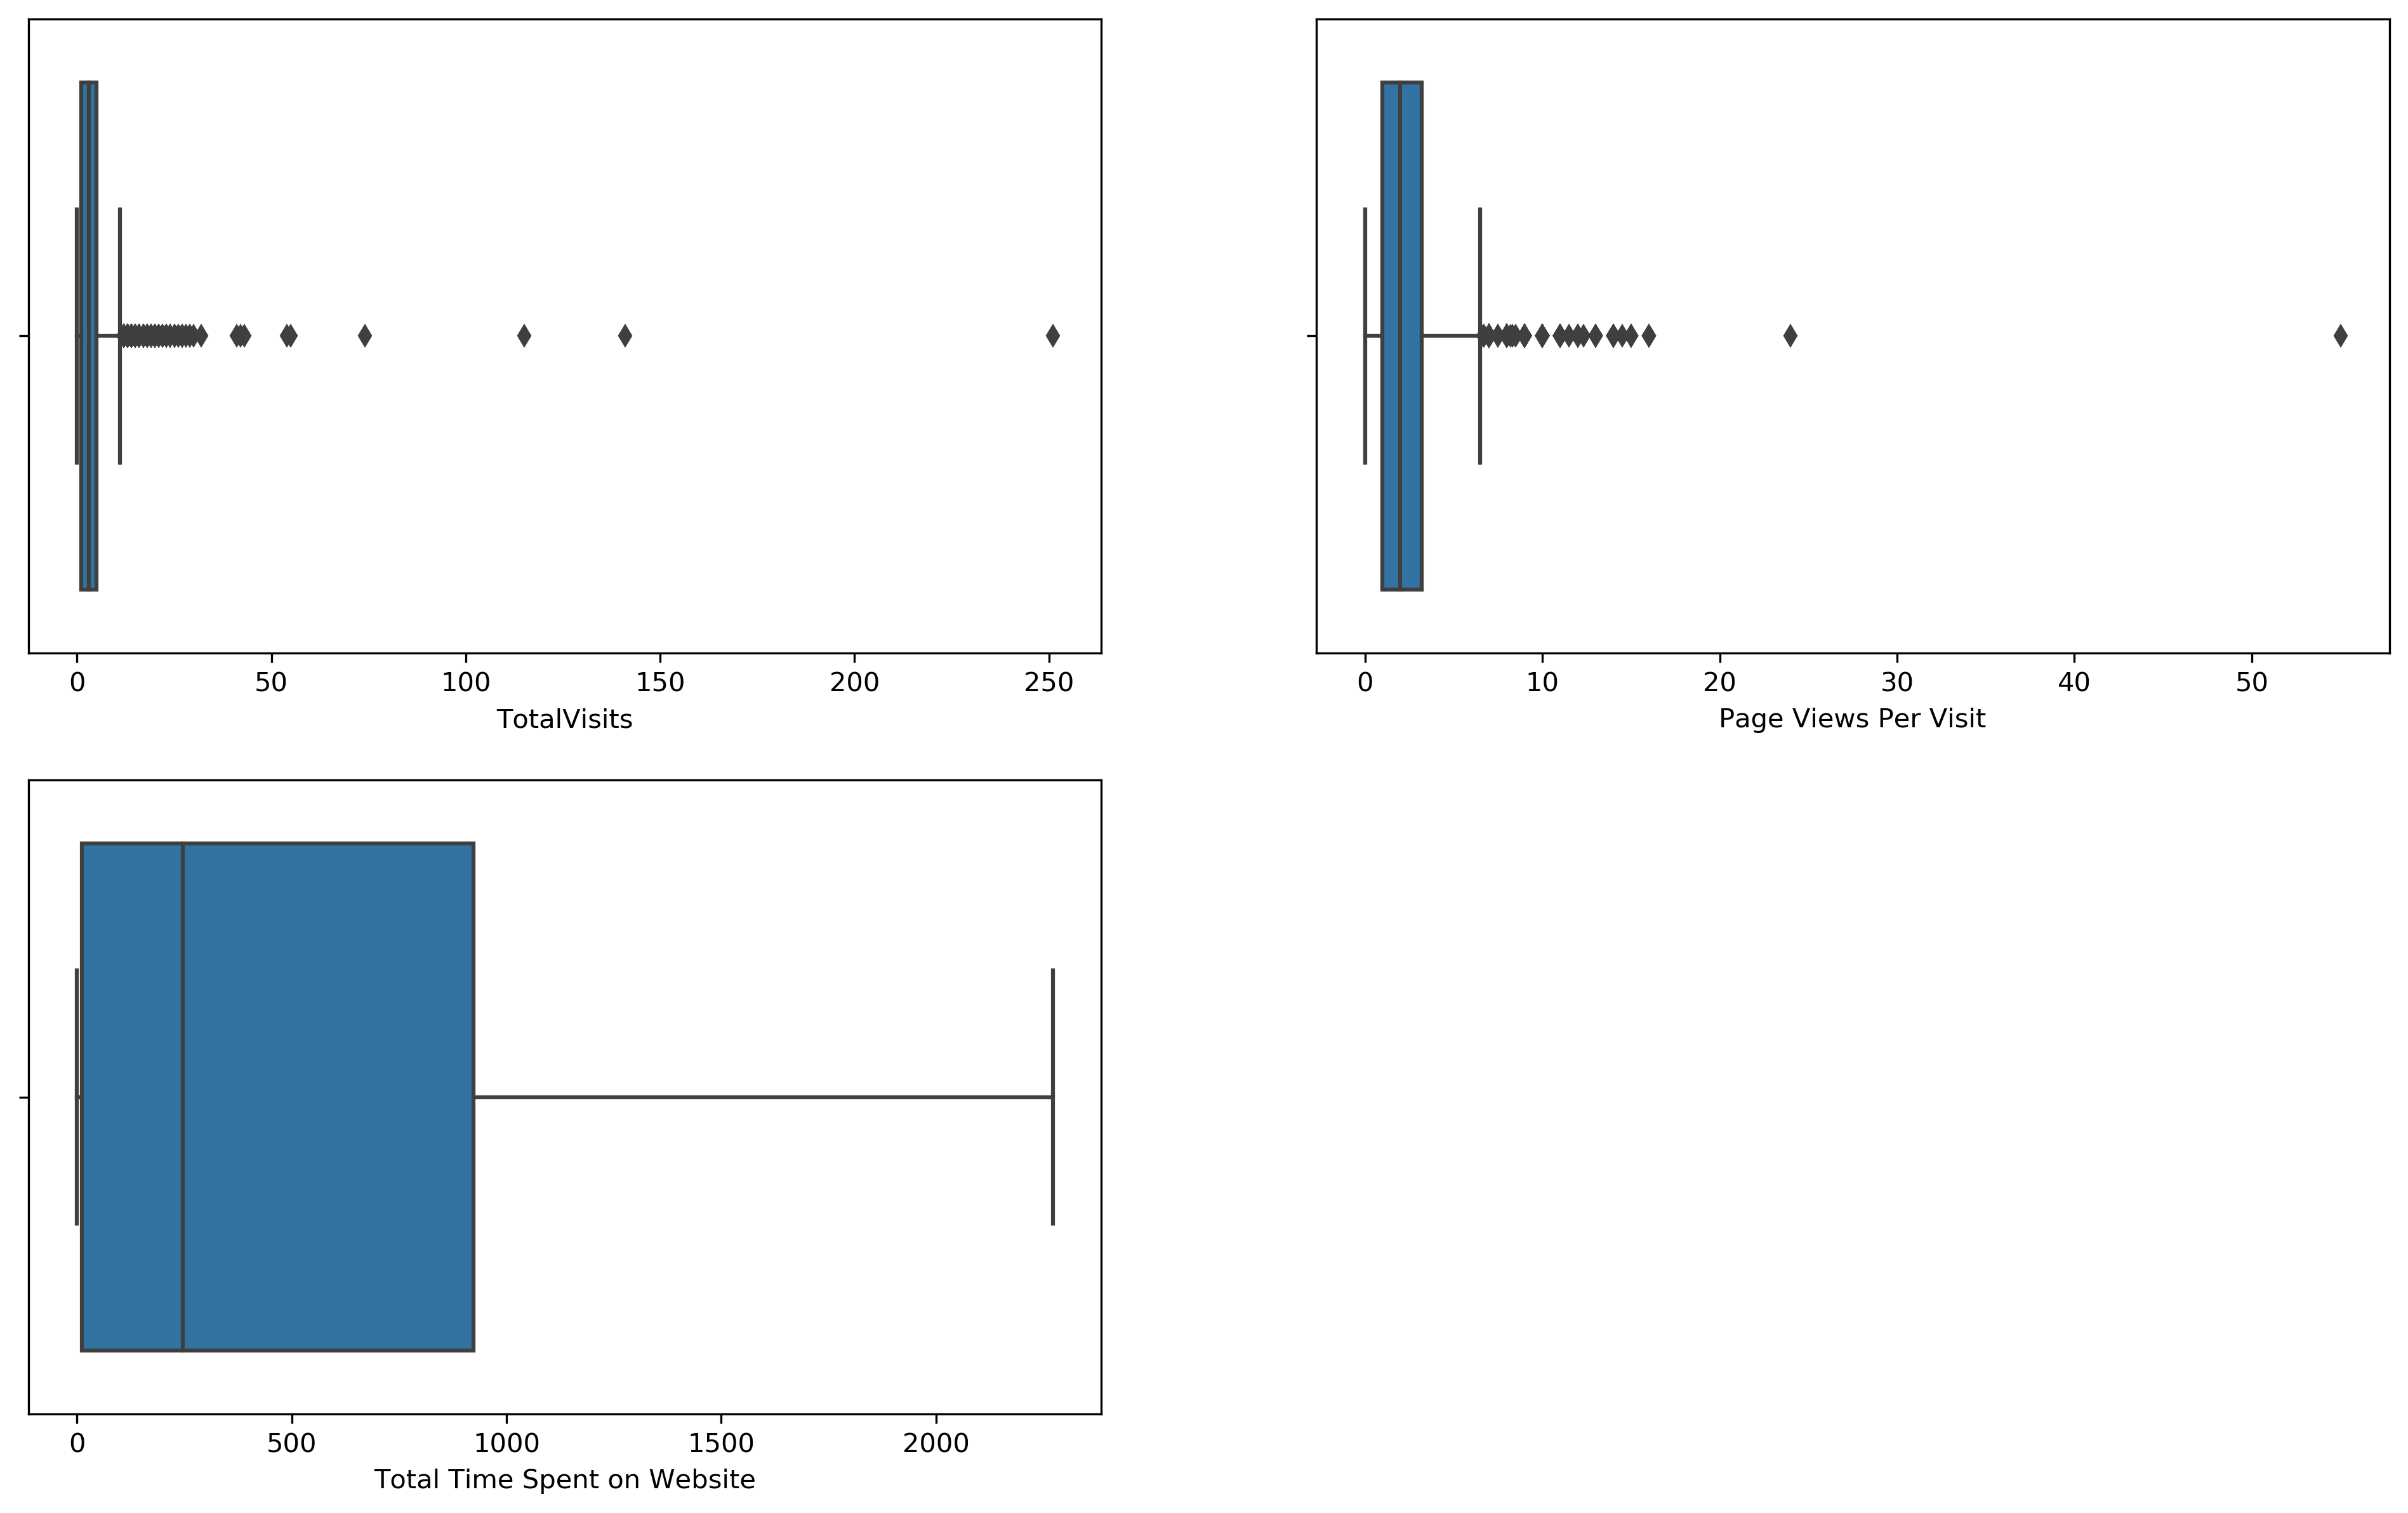

In [40]:
# using enumerate to and for loop to plot boxplots for multiple columns
outlier_col= ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
plt.figure(figsize=(16,15),dpi=300)
for i in enumerate(outlier_col):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=i[1],data=lead)
plt.show()

- Observations:
 1) For columns TotalVisits and Page Views Per Visit  we see there are outliers. For column 'Total Time Spent on Website' there are no outliers. So we will treat columns TotalVisits and Page Views Per Visit  by capping the data

In [41]:
# checking the quantile ranges
lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.0000
mean       2.3702
std        2.1609
min        0.0000
5%         0.0000
25%        1.0000
50%        2.0000
75%        3.2000
90%        5.0000
95%        6.0000
99%        9.0000
max       55.0000
Name: Page Views Per Visit, dtype: float64

In [42]:
# checking the quantile ranges
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.0000
mean       3.4560
std        4.8588
min        0.0000
5%         0.0000
25%        1.0000
50%        3.0000
75%        5.0000
90%        7.0000
95%       10.0000
99%       17.0000
max      251.0000
Name: TotalVisits, dtype: float64

In [43]:
#Capping
q1 = lead['Page Views Per Visit'].quantile(0.95)
q2 = lead['TotalVisits'].quantile(0.95)

lead['Page Views Per Visit'][lead['Page Views Per Visit']>= q1] = q1
lead['TotalVisits'][lead['TotalVisits']>= q2] = q2


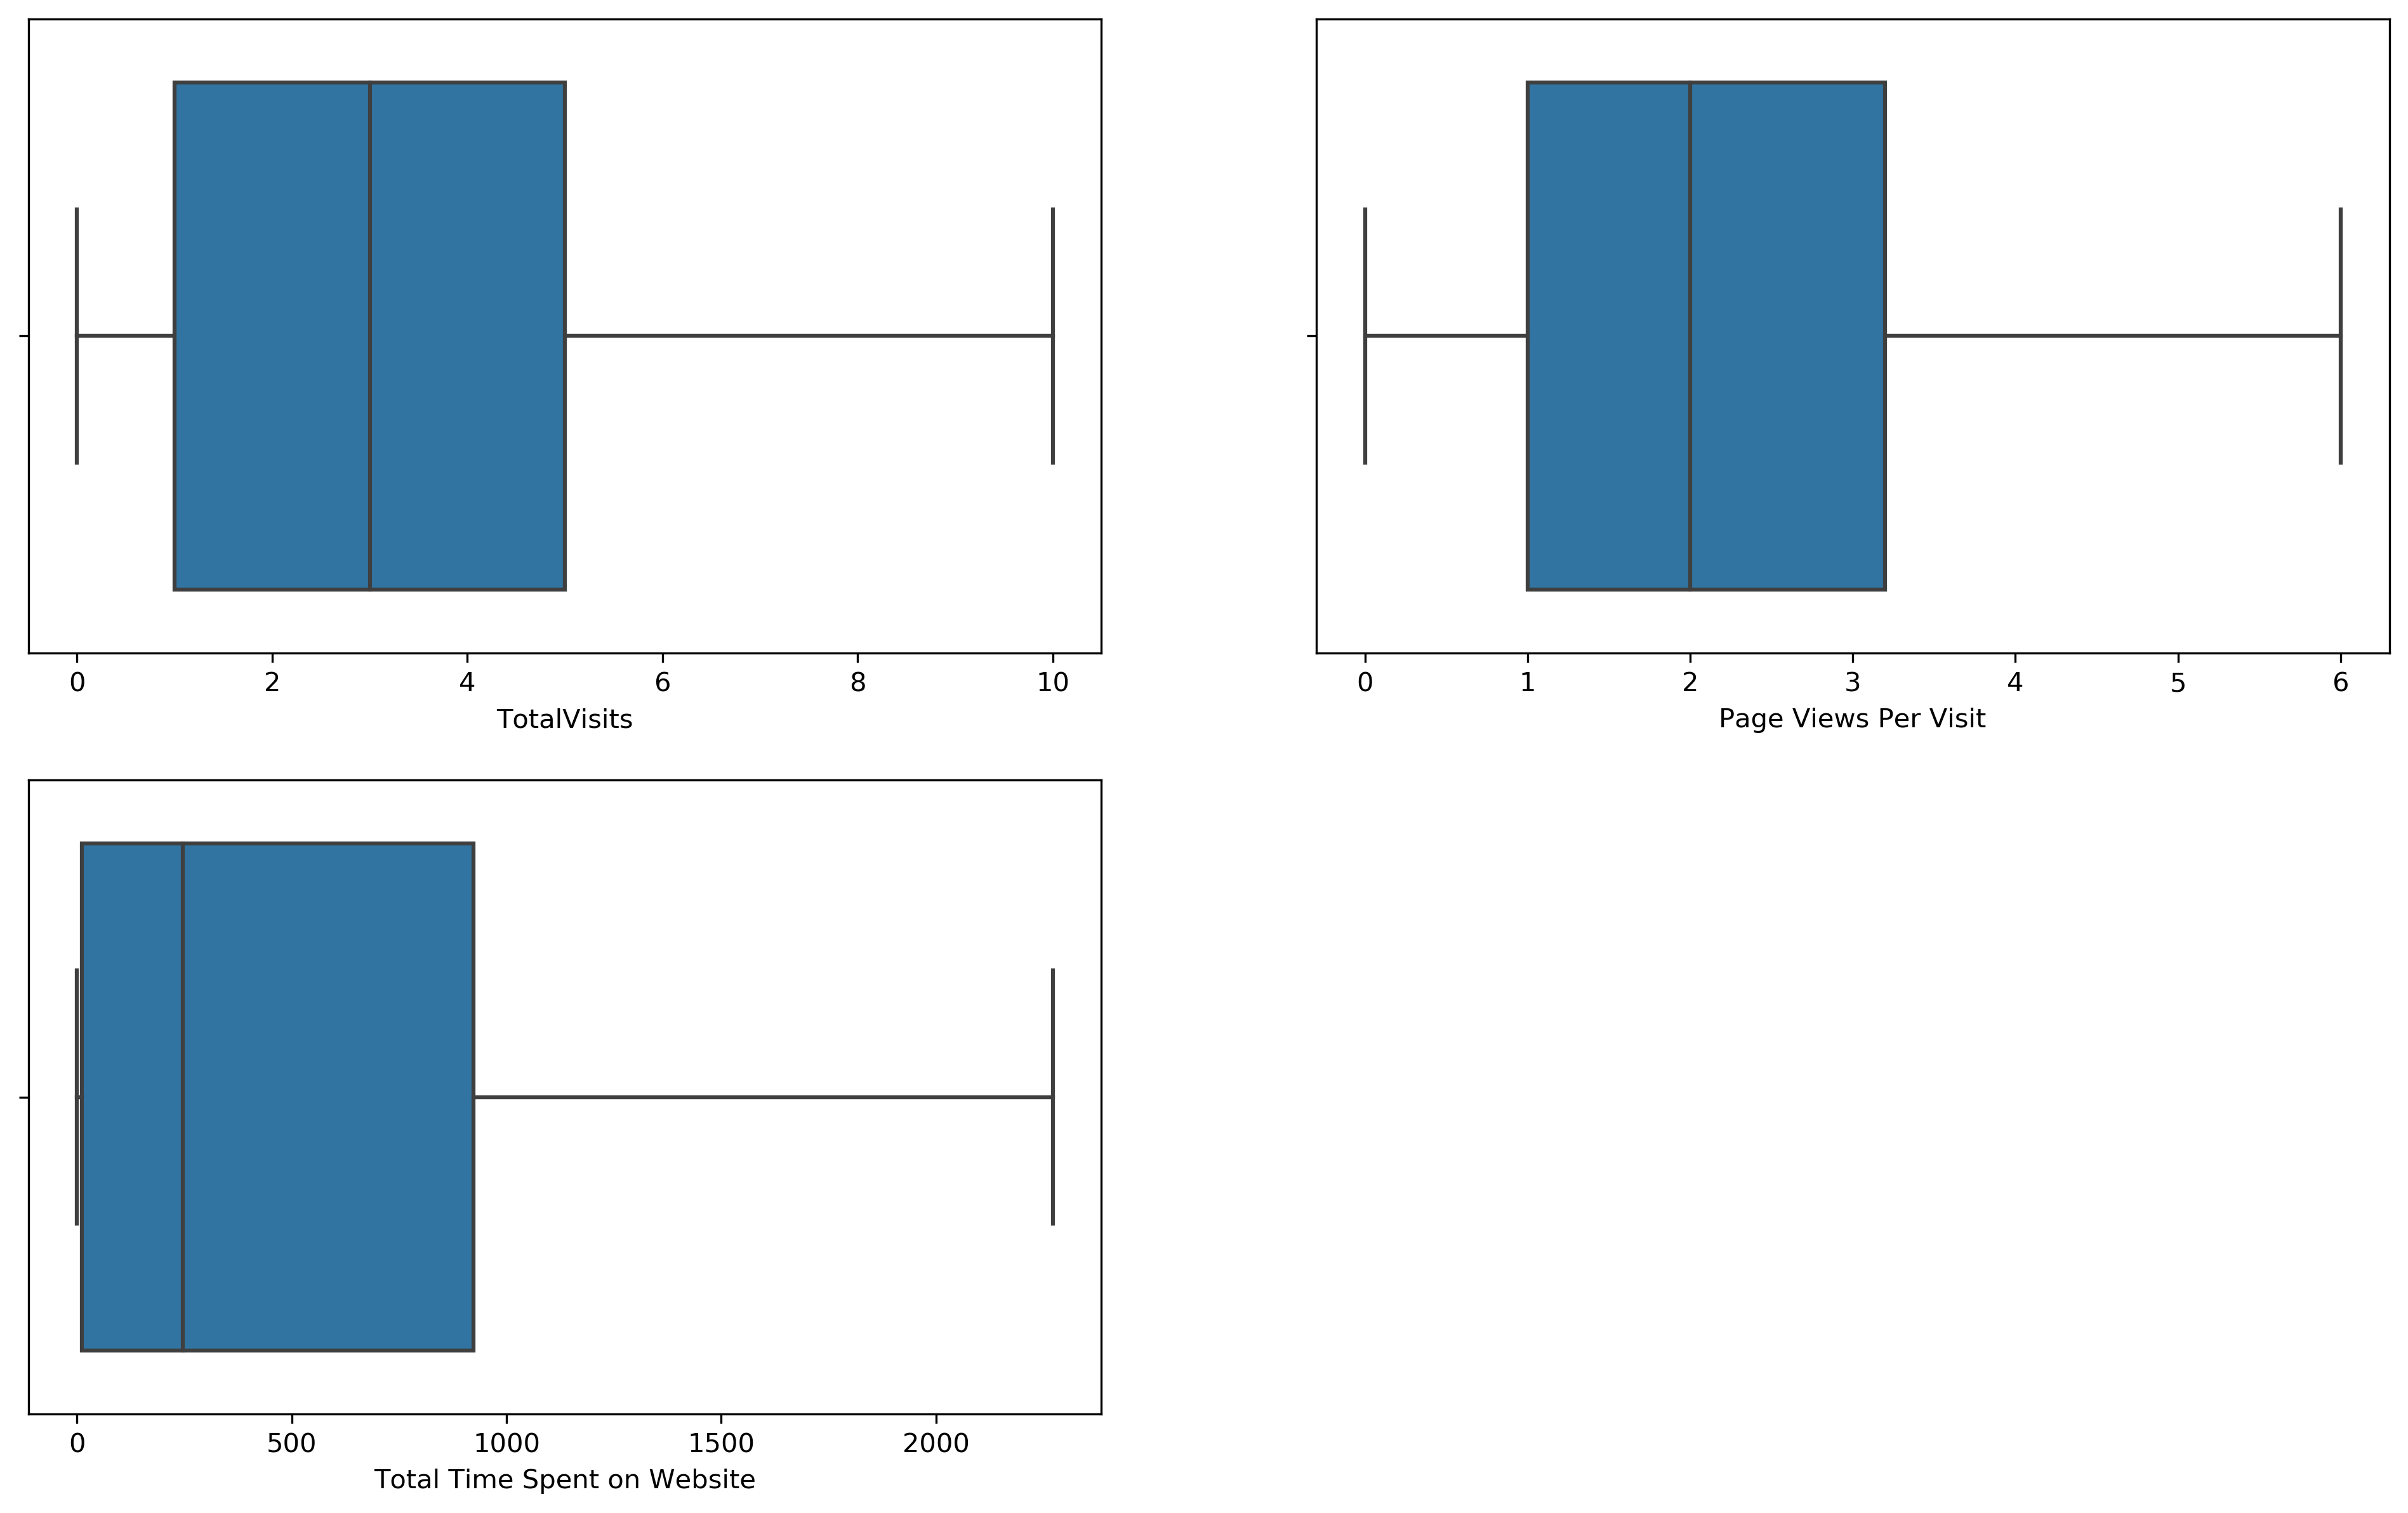

In [44]:
# using enumerate to and for loop to plot boxplots for multiple columns
outlier_col= ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
plt.figure(figsize=(16,15),dpi=300)
for i in enumerate(outlier_col):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=i[1],data=lead)
plt.show()

- Observations:
- Around 50% of customers visit the website 3 times , with the highest number of visits being 10
- Around 75 % of customers visist 3-4  pages on the website


#### Let us check for the remaining categorical columns to find some meaningful patterns

In [45]:
#checking value counts of What is your current occupation column 

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
blog                    1
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [46]:
#replacing Nan Values and combining low frequency values

lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'] ,'Others') 
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')

In [47]:
#checking value counts of What is your current occupation column 

lead['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          33
Others                21
Name: Lead Source, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

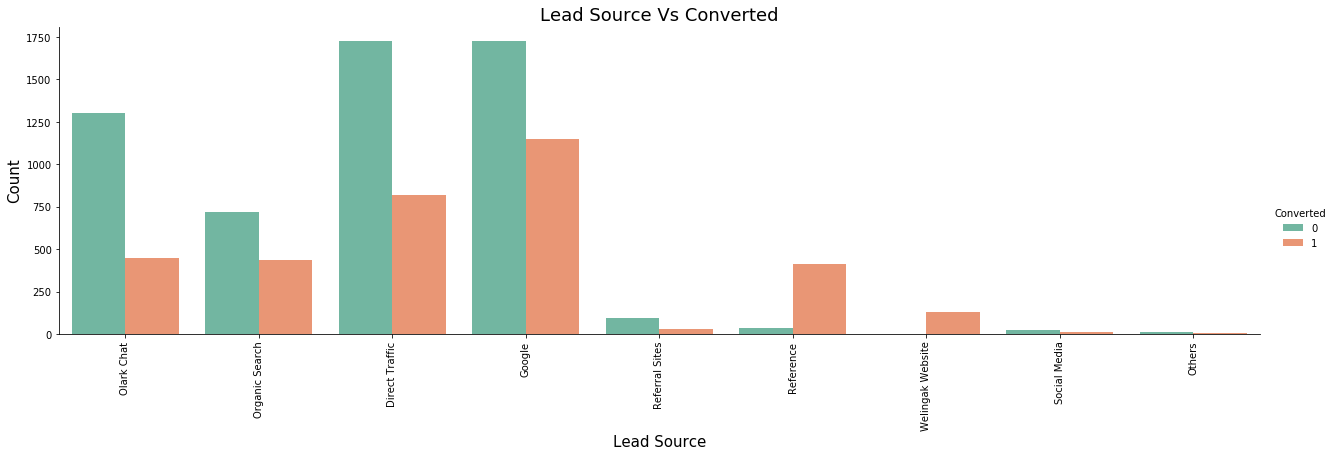

In [48]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 18)
plt.xlabel("Lead Source", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation=90)

- We see that the highest lead source was from Google search and also almost equal number of customers landing directly on the website. Over 1200 cutomers have got converted who came from google followed by Direct traffic source.
- the lowest count belong to 'Others' category. 
- Interestingly , the customers who have come through refernce , have high conversion rate

In [49]:
#checking value counts of Last Activity column
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#replacing Nan Values and combining low frequency values
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

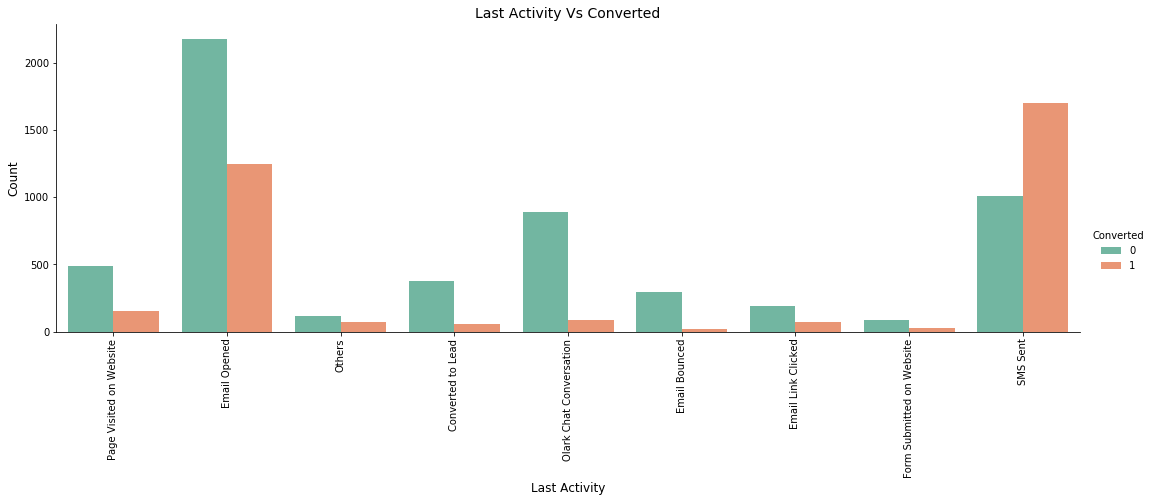

In [51]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()




- Observations
- Over 2000 people had opened the email as their last activity , out of which around 1200 seem to have converted.
- The highest conversion is seen from people who were reached out via sms. 

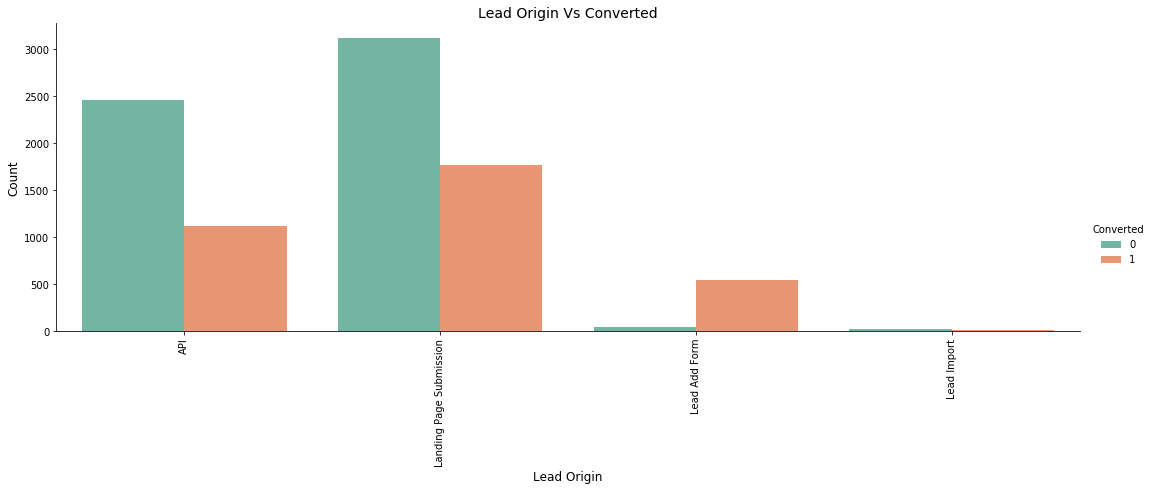

In [52]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 3.0);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

- Landing Page Submission brings higher number of leads as well as conversion followed by API .
- Lead Import gets lowest leads.
- Lead import and Lead Add Form can be foucssed on to generate more leads

In [53]:
#checking value counts of Do Not Email column 

lead['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

Text(18.673929398148154, 0.5, 'Count')

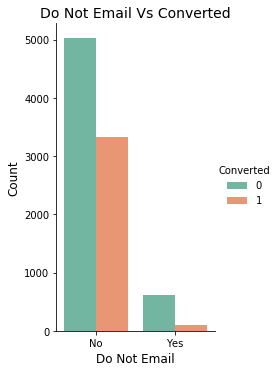

In [54]:

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

- The ratio of  people opting to be reached out via email is high , we also observe that those who were reached out via email have actually converted. the number is between 3000 -3500

In [55]:
#checking value counts of Do Not Email column 

lead['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

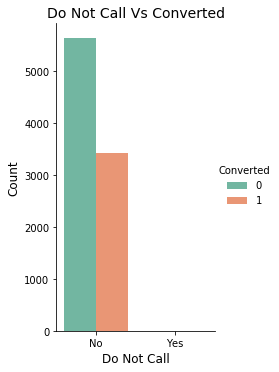

In [56]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

- Out of 9072 customers reached out via call is high , more than 3000 people have converted.
- We do not see customers having an issue being reached out via phone calls

In [57]:
#checking the unique values in each column
lead.nunique().sort_values()

I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Through Recommendations                             2
Newspaper                                           2
X Education Forums                                  2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Newspaper Article                                   2
Digital Advertisement                               2
Search                                              2
A free copy of Mastering The Interview              2
What matters most to you in choosing a course       3
Lead Origin                                         4
City                                                6
What is your current occupat

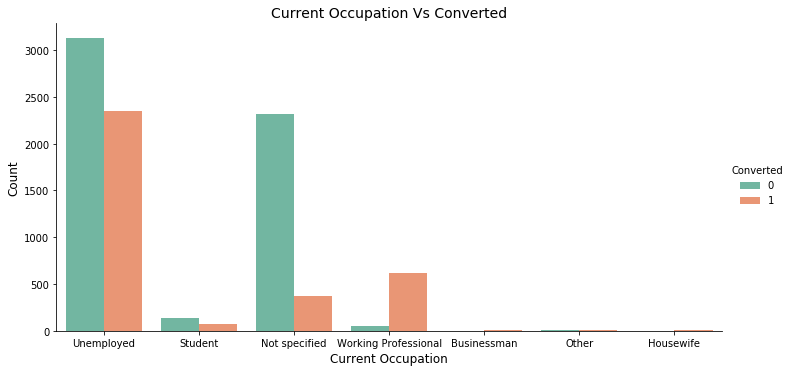

In [58]:

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead, palette="Set2", aspect = 2.0);
plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

- More than 3000 people belong to the Unemployed category and thisn category also has the highest count of conversion as compared to all other categories
- The ratio of conversion to not conversion is high for 'Working Professionals' 
- Customers who have not specified their current occupation have do not tend to convert 

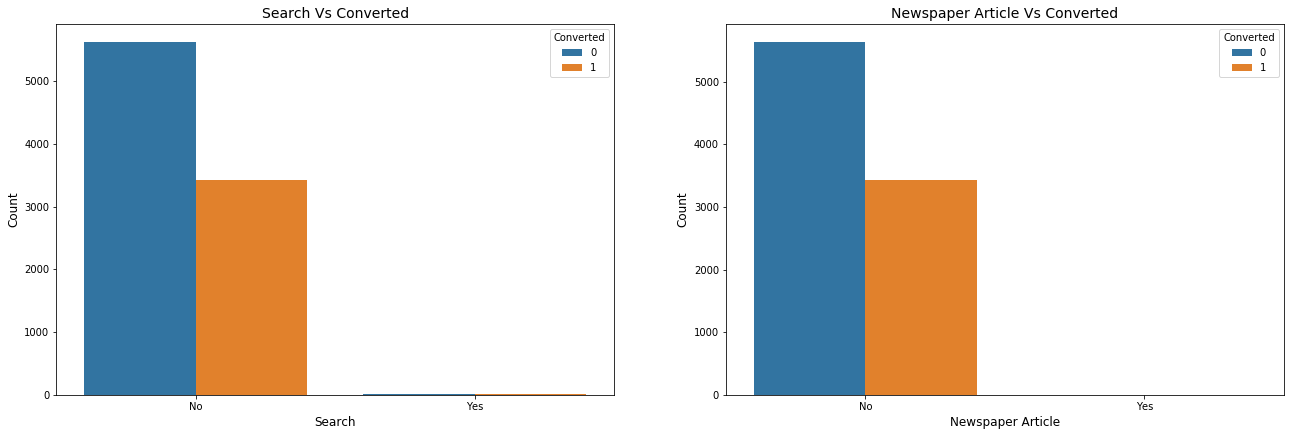

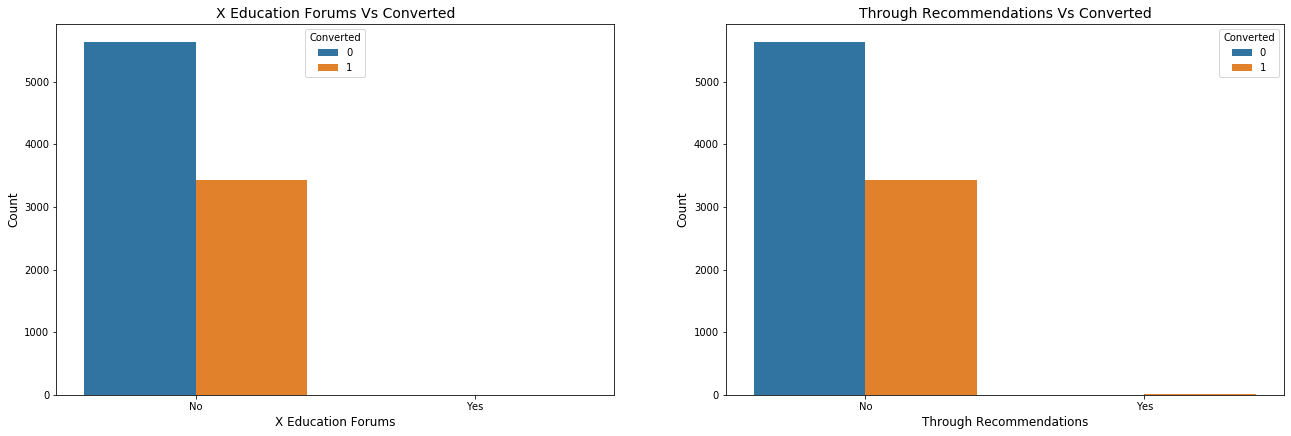

In [59]:
#univariate categorocal analysis
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
sns.countplot(x="Search", hue="Converted", data=lead)
plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

plt.subplot(2,2,2)
sns.countplot(x="Newspaper Article", hue="Converted", data=lead)
plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

plt.figure(figsize=(22,15))
plt.subplot(2,2,3)
sns.countplot(x="X Education Forums", hue="Converted", data=lead)
plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)



plt.subplot(2,2,4)
sns.countplot(x="Through Recommendations", hue="Converted", data=lead)
plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()


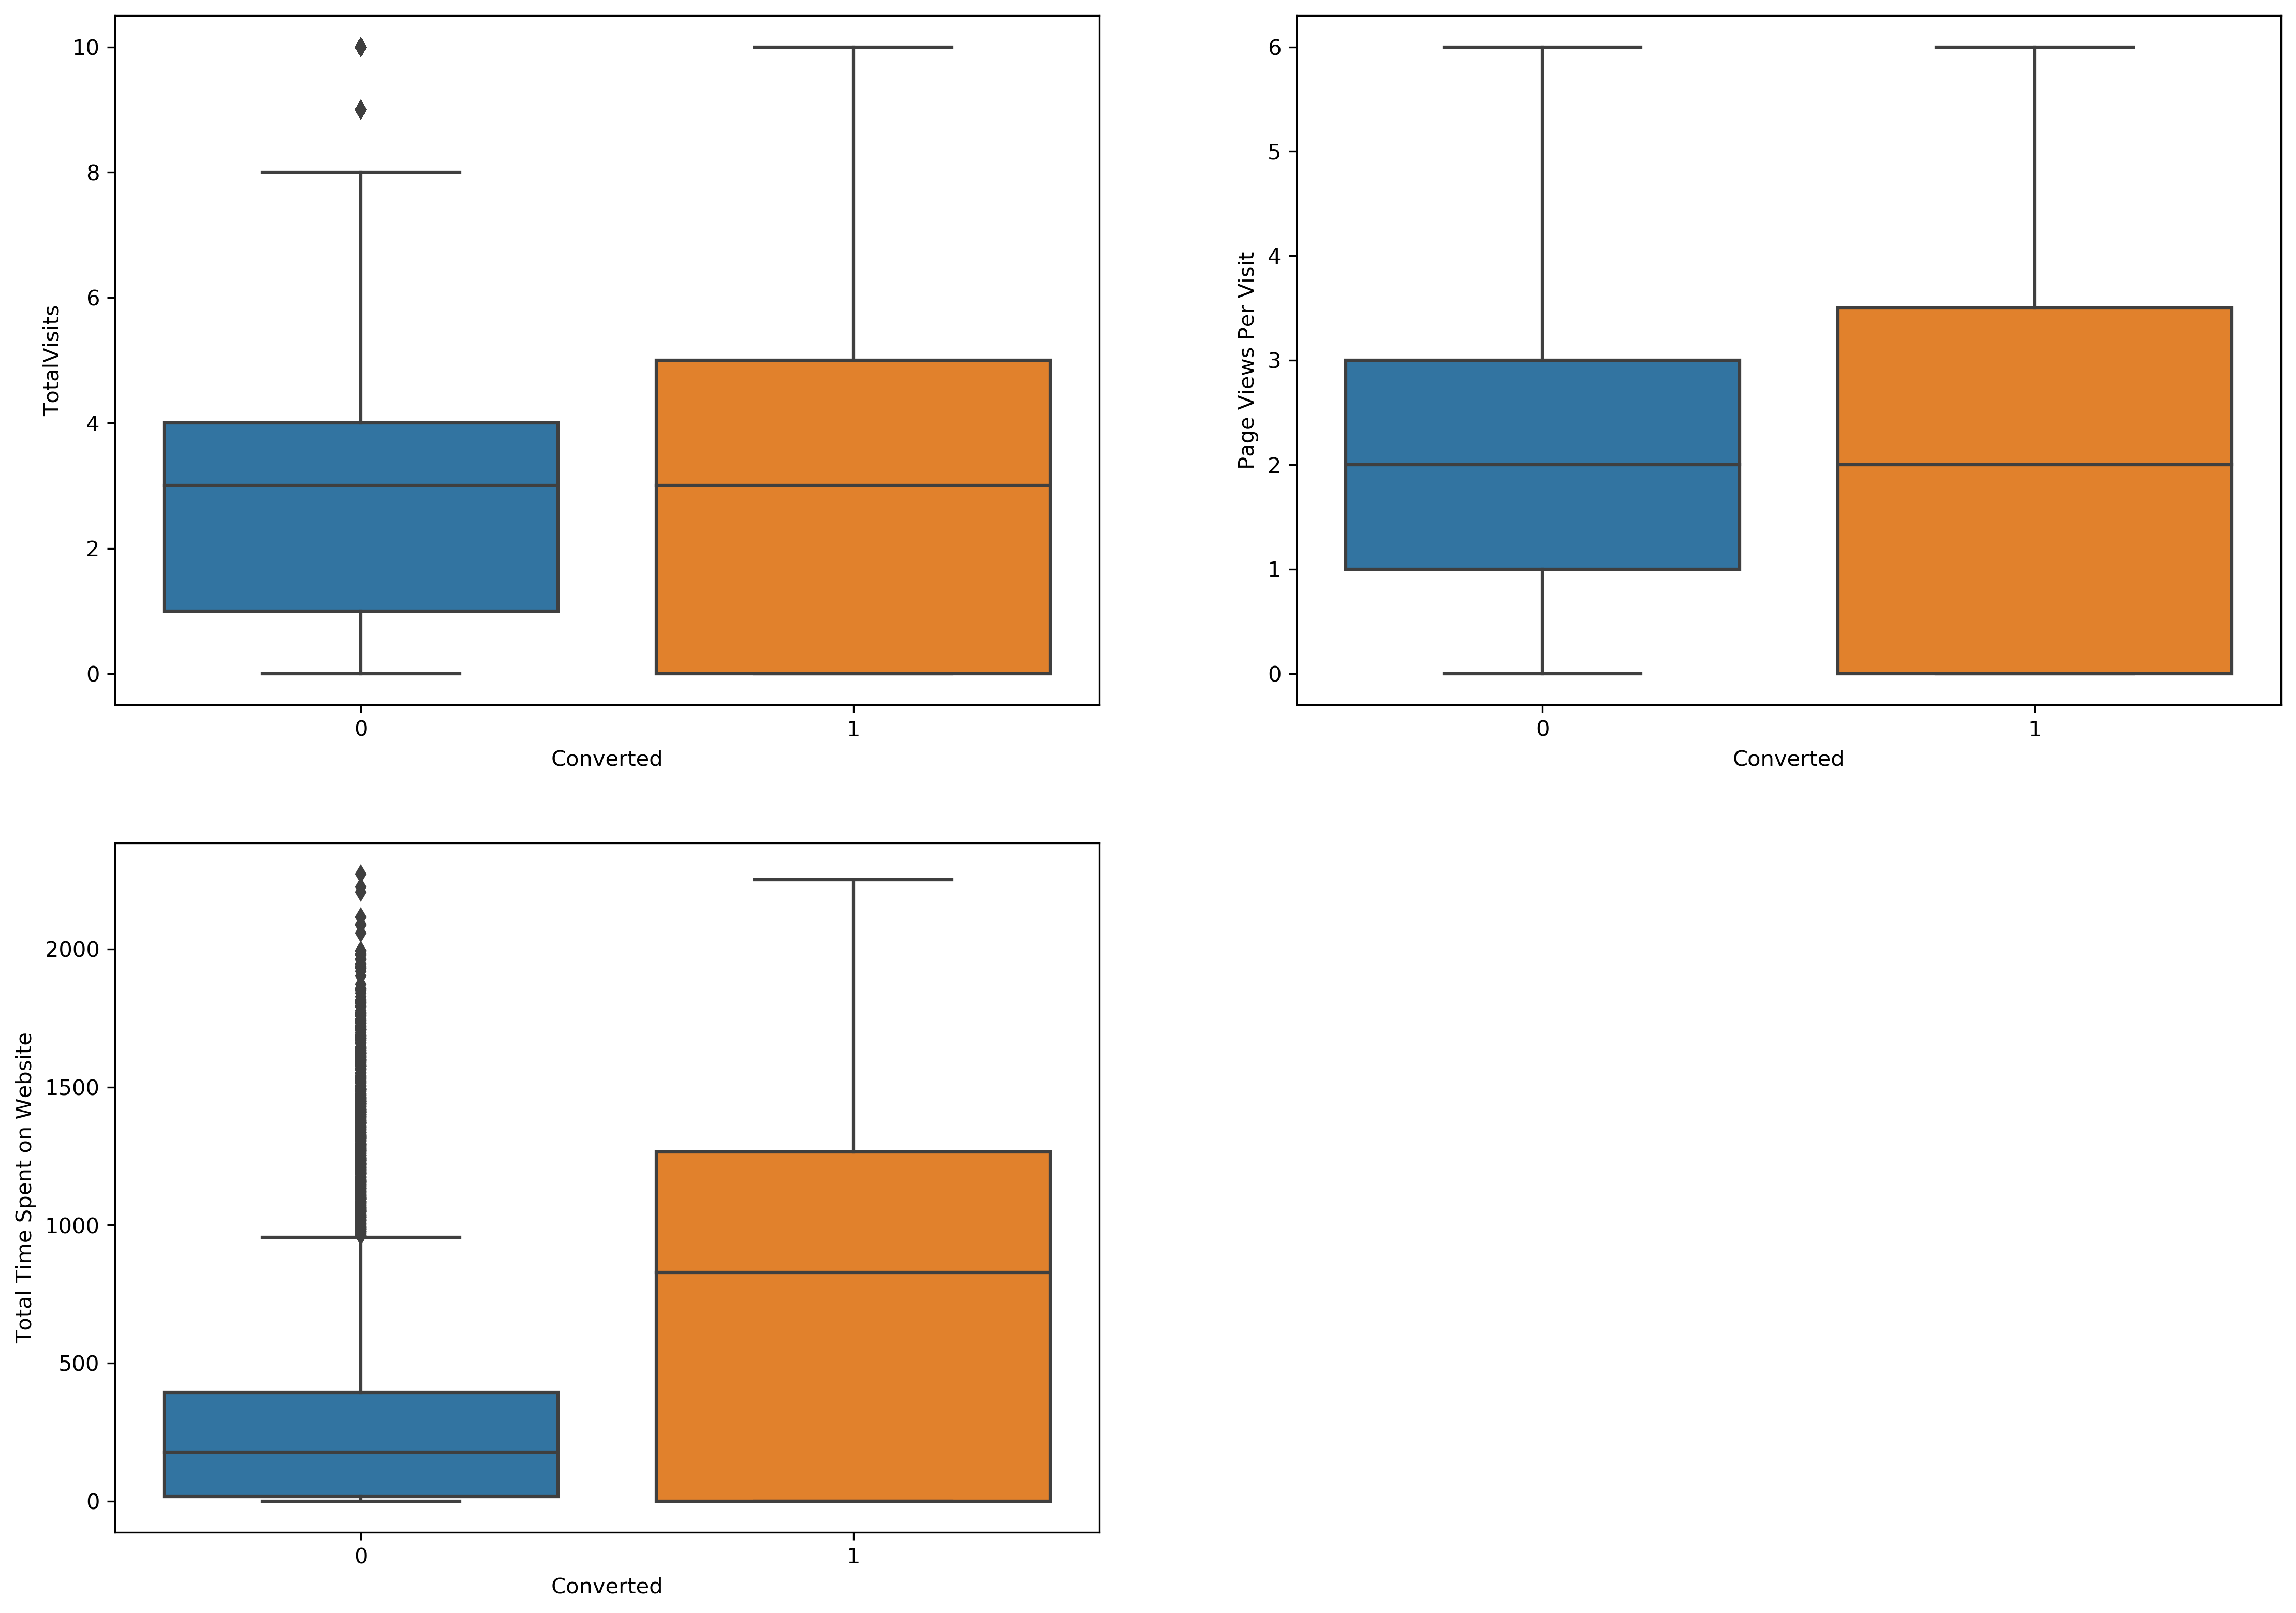

In [60]:
#continuous univariate analysis
# using enumerate to and for loop to plot boxplots for multiple columns
outlier_col= ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
plt.figure(figsize=(18,20),dpi=300)
for i in enumerate(outlier_col):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x="Converted", y=i[1],data=lead)
plt.show()

- Customers who spend more time on the website have high conversion rate
- We cannot say much about the conversion from the Pages viewed as the means is almost same for Converted , yes and No


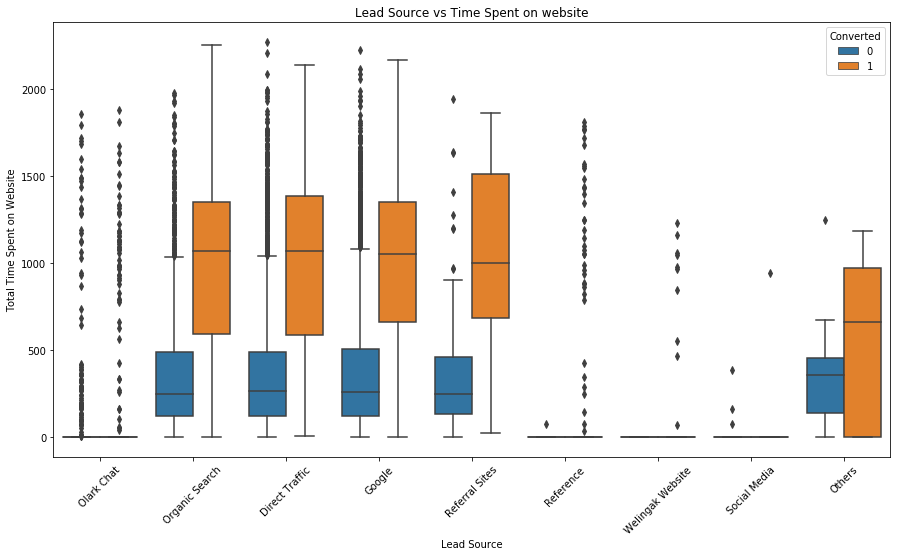

In [61]:
#bivariate analysis of Continuous-Categorical columns
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.boxplot(data=lead,x='Lead Source', y='Total Time Spent on Website',hue='Converted',orient="v")
plt.title("Lead Source vs Time Spent on website")
plt.show()

- Leads coming in through referral sites , Google, Direct traffic, Organic Search spend more time on the website and also have a good conversion rate


In [62]:
# Checking the unique values in each column
lead.agg(['count', 'size', 'nunique'])

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
size,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
nunique,9074,9074,4,9,2,2,2,11,1717,91,9,38,19,7,3,2,1,2,2,2,2,2,1,26,1,1,6,1,2,16


Checking for unique values in various categorical columns which have 2 unique values

In [63]:

lead['Do Not Call'].value_counts(normalize=True)*100

No    99.9780
Yes    0.0220
Name: Do Not Call, dtype: float64

In [64]:
lead['Do Not Email'].value_counts(normalize=True)*100

No    92.1093
Yes    7.8907
Name: Do Not Email, dtype: float64

In [65]:
lead['Search'].value_counts(normalize=True)*100


No    99.8457
Yes    0.1543
Name: Search, dtype: float64

In [66]:
lead['Newspaper Article'].value_counts(normalize=True)*100


No    99.9780
Yes    0.0220
Name: Newspaper Article, dtype: float64

In [67]:

lead['Digital Advertisement'].value_counts(normalize=True)*100



No    99.9559
Yes    0.0441
Name: Digital Advertisement, dtype: float64

In [68]:

lead['Through Recommendations'].value_counts(normalize=True)*100



No    99.9229
Yes    0.0771
Name: Through Recommendations, dtype: float64

In [69]:
lead['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects     99.9780
Flexibility & Convenience    0.0110
Other                        0.0110
Name: What matters most to you in choosing a course, dtype: float64

In [70]:
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)*100


No    68.1728
Yes   31.8272
Name: A free copy of Mastering The Interview, dtype: float64

- So we see that above categorical columns - Do Not Call,Search, Newspaper Article,Digital Advertisement ,What matters most to you in choosing a course are highly skewed , so we will drop these coulmns from our dataset
- There are multiple columns which have only one category, so these columns will not help in the model building. Hence we will drop these columns - Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque

In [71]:
#dropping all the skewed and single categorical columns and also sales gebearted cols like Last Notable Activity
lead.drop(['Do Not Call','Search','Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course'],axis=1,inplace=True)

In [72]:
lead.nunique()

Prospect ID                               9074
Lead Number                               9074
Lead Origin                                  4
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1717
Page Views Per Visit                        91
Last Activity                                9
Country                                     38
Specialization                              19
What is your current occupation              7
Tags                                        26
City                                         6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

- There are few sales genearted columns which will not be available to us while building the model , so we will drop those as well


In [73]:
lead.drop(['Last Activity','Tags'],axis=1,inplace=True)

##### Few additional columns to drop:
- As seen in the data cleaning steps , column 'Country' is also highly skewed as most of the customers belong to India, 
- Prospect ID and Lead Number help us to uniquely identify the rows , so we will retain only one column which is Lead Number

In [74]:
lead.drop(['Country','Prospect ID'],axis=1,inplace=True)

In [75]:
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


### Step 4: Data Preparation - Creating Dummies¶


Converting some binary variables (Yes/No) to 0/1


In [76]:
#list of variables to be mapped
varlist=["A free copy of Mastering The Interview","Do Not Email"]


# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist
lead[varlist] = lead[varlist].apply(binary_map)


In [77]:
lead['Do Not Email'].value_counts(dropna=False)


0    8358
1     716
Name: Do Not Email, dtype: int64

In [78]:
lead['A free copy of Mastering The Interview'].head()


0    0
1    0
2    1
3    0
4    0
Name: A free copy of Mastering The Interview, dtype: int64

In [79]:
lead['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

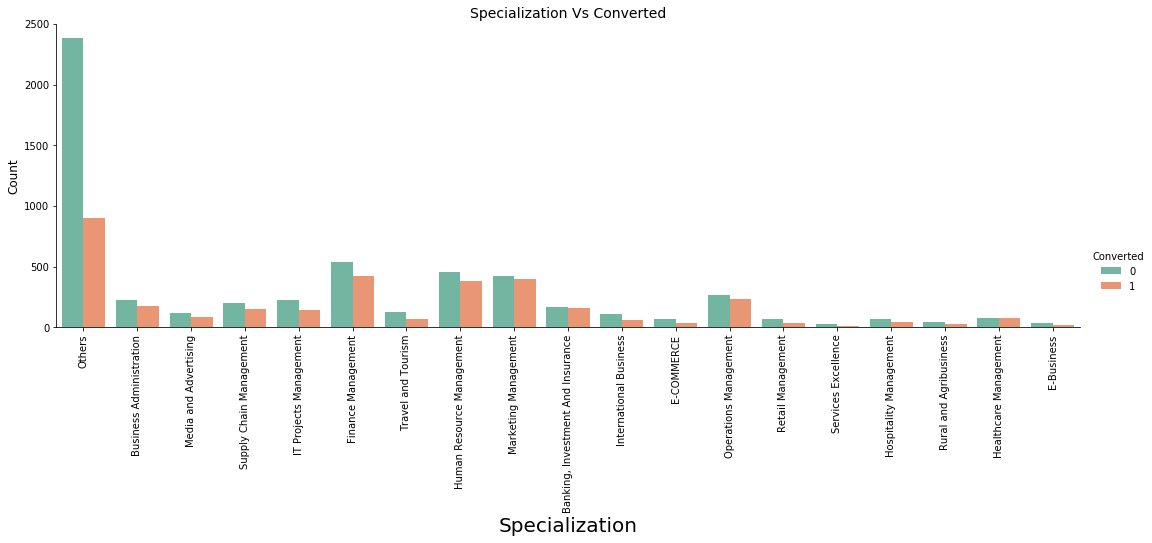

In [80]:
#plotting spread of Specialization columnn after replacing NaN values

#plt.figure(figsize=(15,5))
plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=lead, palette="Set2",aspect= 3);
plt.title('Specialization Vs Converted', fontsize = 14)
plt.xlabel("Specialization", fontsize = 20)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

- As seen above , the specialization column has 19 categories , so to reduce these categories for performing one hot enconding ,
we will combine all management related specializations in one broad category called as 'Management'

In [81]:
lead['Specialization'] = lead['Specialization'].replace(['E-COMMERCE','Rural and Agribusiness','E-Business','Services Excellence','International Business'],'Other_Services')

In [82]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [83]:
lead['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Social Media          33
Others                21
Name: Lead Source, dtype: int64

In [84]:
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront','Email Received'
'Form Submitted on Website',
'View in browser link Clicked',
'Resubscribed to emails'
],'Other_Activity')

In [85]:
#finding the list of categorical columns
cat_cols= lead.select_dtypes(include=['object']).columns

In [86]:
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [87]:
#creating the dummy variable for the categorical variables and drop the first one 
dummy1=pd.get_dummies(lead[["Lead Origin","Lead Source","Specialization","What is your current occupation","Last Notable Activity",'City']],drop_first=True)

In [88]:
#concat the dummy data and the datset
lead=pd.concat([lead,dummy1],axis=1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Services,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0,0.0000,0,0.0000,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0000,674,2.5000,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0000,1532,2.0000,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0000,305,1.0000,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0000,1428,1.0000,Others,Unemployed,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [89]:
lead.head() 

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Services,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,API,Olark Chat,0,0,0.0000,0,0.0000,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0000,674,2.5000,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0000,1532,2.0000,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0000,305,1.0000,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0000,1428,1.0000,Others,Unemployed,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Specialization','Lead Origin','Lead Source','What is your current occupation','Last Notable Activity','City'], 1)

In [91]:
lead.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other_Services',
       'Spe

In [92]:
lead.shape

(9074, 53)

- We have 9074 rows and 53 columns after dummification left in our dataset. We will now proceed to split our dataset in test train

### Step 5: Test-Train Split

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Putting feature variable to X
X = lead.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Services,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0000,0,0.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0000,674,2.5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0000,1532,2.0000,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0000,305,1.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,2.0000,1428,1.0000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [95]:
# Putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Services,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,-0.4328,-0.1603,-0.1550,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.4328,-0.5400,-0.1550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-1.1503,-0.8887,-1.2655,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4750,0,-0.4328,1.6433,-0.1550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7987,0,0.6435,2.0176,0.1226,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [99]:
### Checking the Converted Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

37.85541106458012

As seen fromt he above results, we have 37 % of converasion rate

### Step 7: Looking at Correlations

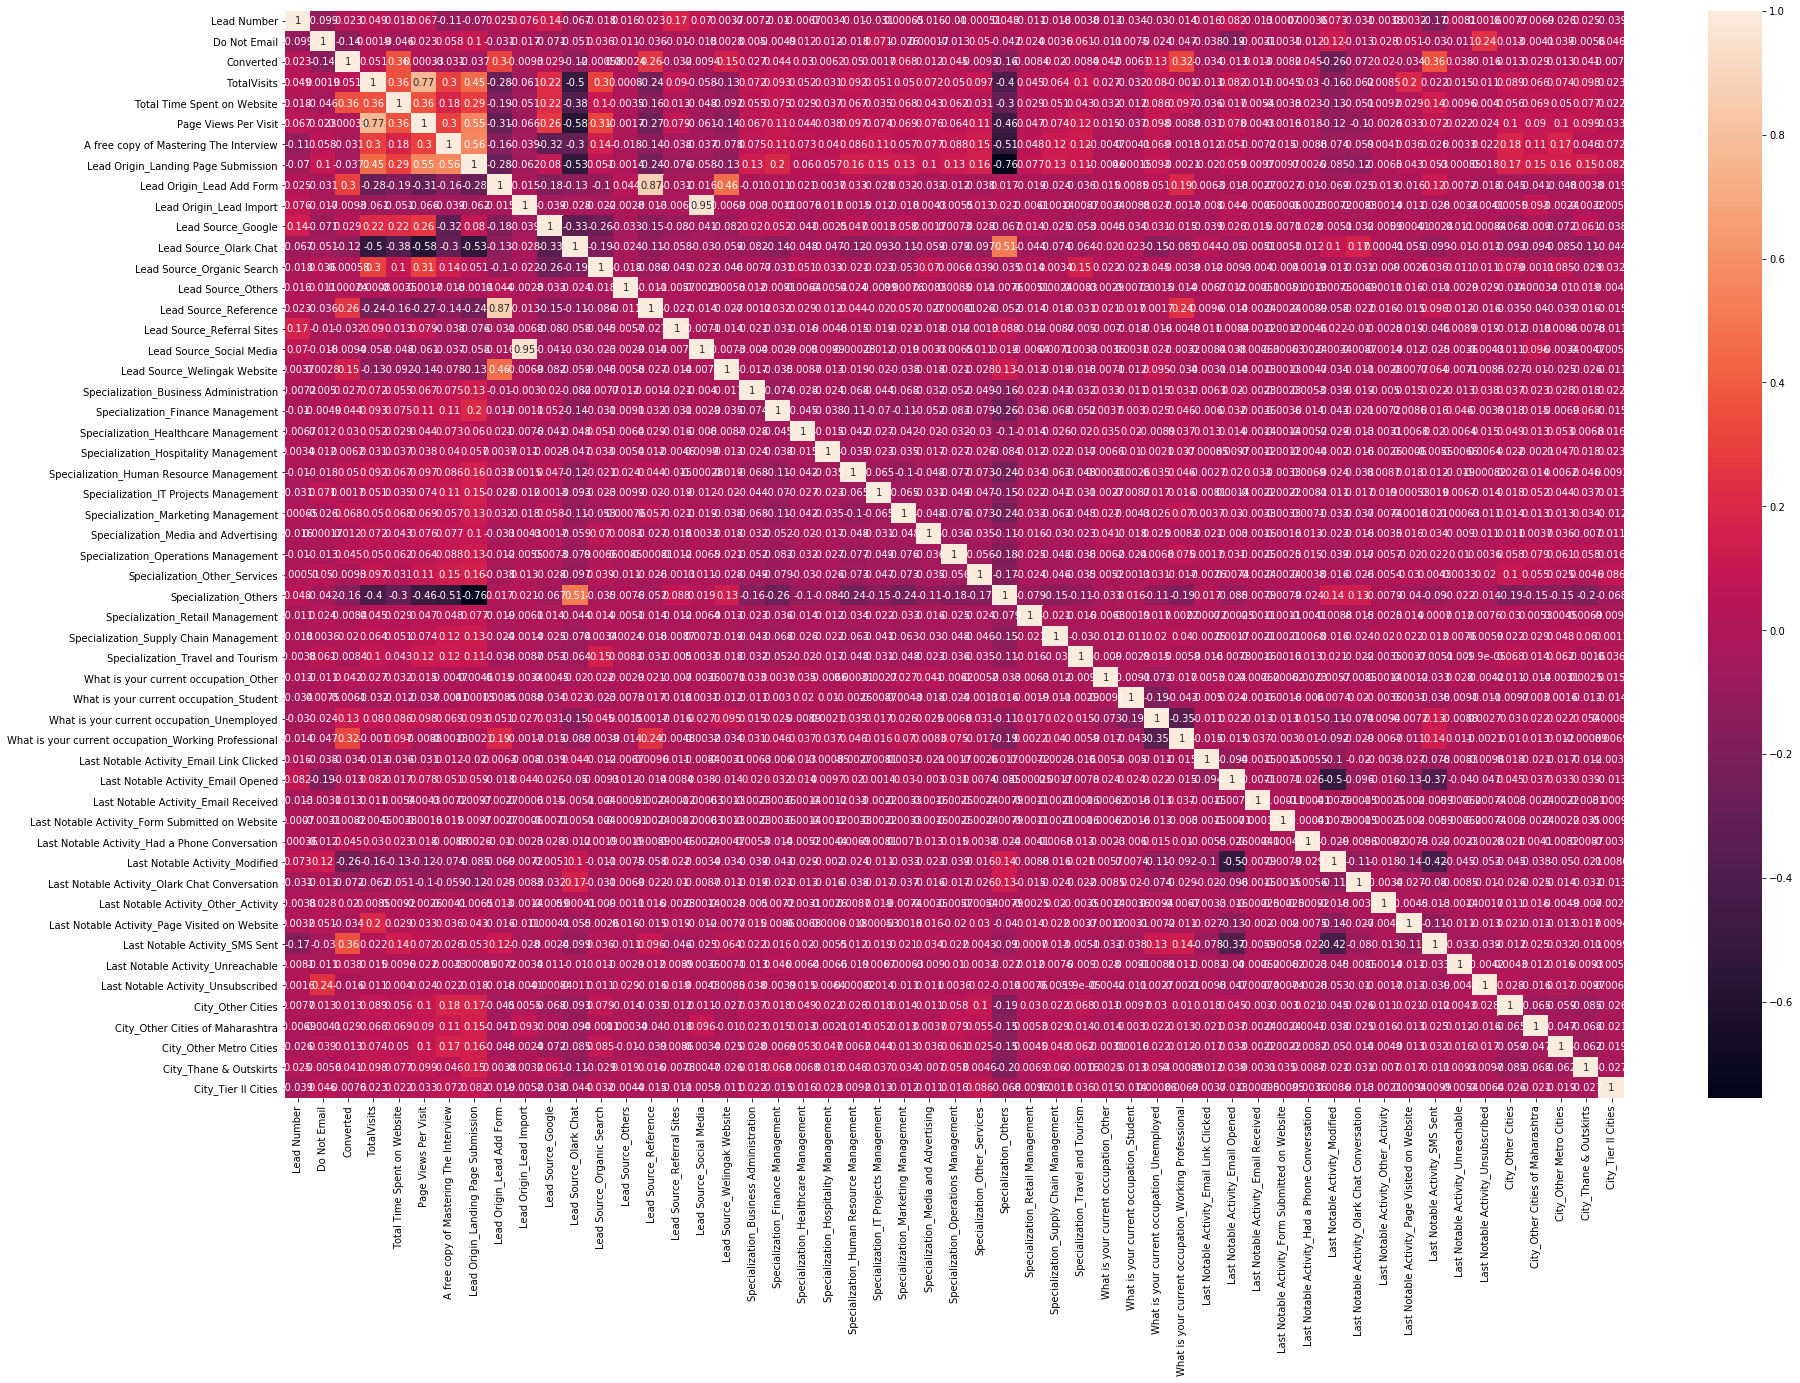

In [100]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(lead.corr(),annot = True)
plt.show()

### Step 8: Model Building


#### Running Your First Training Model

In [101]:
#importing libraries for building a model
import statsmodels.api as sm

#logistic regression model
mod1=sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.2
Date:                Mon, 26 Oct 2020   Deviance:                       5012.4
Time:                        20:41:26   Pearson chi2:                 6.26e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1042      0.617     -1.790      0.073      -2.313       0.105
Do Not Email                                            -1.6104      0.213     -7.548      0.000      -2.029      -1.192
TotalVisits                                              0.3323      0.058      5.767      0.000       0.219       0.445
Total Time Spent on Website                              1.1253      0.042     26.735      0.000       1.043       1.208
Page Views Per Visit                                    -0.3118      0.065     -4.832      0.000      -0.438      -0.185
A free copy of Mastering The Interview                  -0.2141      0.112     -1.906      0.057      -0.434       0.006
Lead Origin_Landing Page Submission                     -0.7245      0.139     -5.209      0.000      -0.997      -0.452
Lead Origin_Lead Add Form                                0.8962      1.065      0.842      0.400      -1.191       2.983
Lead Origin_Lead Import                                  0.8713      1.430      0.609      0.542      -1.932       3.675
Lead Source_Google                                       0.2565      0.117      2.185      0.029       0.026       0.487
Lead Source_Olark Chat                                   1.3046      0.168      7.766      0.000       0.975       1.634
Lead Source_Organic Search                               0.0920      0.135      0.682      0.495      -0.172       0.356
Lead Source_Others                                       0.8093      0.744      1.088      0.277      -0.648       2.267
Lead Source_Reference                                    2.6064      1.089      2.394      0.017       0.472       4.741
Lead Source_Referral Sites                              -0.0430      0.361     -0.119      0.905      -0.750       0.664
Lead Source_Social Media                                 0.2567      1.351      0.190      0.849      -2.392       2.905
Lead Source_Welingak Website                             5.1225      1.293      3.963      0.000       2.589       7.656
Specialization_Business Administration                  -0.3057      0.250     -1.223      0.221      -0.796       0.184
Specialization_Finance Management                       -0.1609      0.209     -0.769      0.442      -0.571       0.249
Specialization_Healthcare Management                    -0.2214      0.320     -0.692      0.489      -0.849       0.406
Specialization_Hospitality Management                   -0.6661      0.376     -1.772      0.076      -1.403       0.071
Specialization_Human Resource Management                -0.1959      0.211     -0.928      0.353      -0.609       0.218
Specialization_IT Projects Management                   -0

### Step 9: Feature Selection Using RFE

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_Finance Management', False, 28),
 ('Specialization_Healthcare Management', False, 27),
 ('Specialization_Hospitality Management', False, 5),
 ('Specialization_Human Resource Management', False, 26),
 ('Specialization_IT Projects Management', False, 34),
 ('Specialization_Marketing 

In [105]:
col = X_train.columns[rfe.support_]

In [106]:
#checking the variables not supported by the rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other_Services',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable

##### Assessing the model with StatsModels

In [107]:
X_train_sm=sm.add_constant(X_train[col])
mod2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res= mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.6
Date:                Mon, 26 Oct 2020   Deviance:                       5137.3
Time:                        20:41:32   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4837      0.148    -10.026      0.000      -1.774      -1.194
Do Not Email                                            -1.7420      0.192     -9.088      0.000      -2.118      -1.366
Total Time Spent on Website                              1.1174      0.041     27.023      0.000       1.036       1.198
Lead Origin_Landing Page Submission                     -0.9390      0.129     -7.299      0.000      -1.191      -0.687
Lead Origin_Lead Add Form                                1.4131      0.897      1.575      0.115      -0.346       3.172
Lead Origin_Lead Import                                  1.0477      0.476      2.200      0.028       0.114       1.981
Lead Source_Olark Chat                                   1.0864      0.122      8.894      0.000       0.847       1.326
Lead Source_Reference                                    1.9042      0.920      2.069      0.039       0.100       3.708
Lead Source_Welingak Website                             4.4383      1.155      3.844      0.000       2.175       6.701
Specialization_Others                                   -0.9822      0.125     -7.877      0.000      -1.227      -0.738
What is your current occupation_Other                    2.3078      0.567      4.071      0.000       1.197       3.419
What is your current occupation_Student                  1.2551      0.232      5.405      0.000       0.800       1.710
What is your current occupation_Unemployed               1.1292      0.090     12.575      0.000       0.953       1.305
What is your current occupation_Working Professional     3.5208      0.206     17.108      0.000       3.117       3.924
Last Notable Activity_Had a Phone Conversation           3.5800      1.122      3.190      0.001       1.381       5.779
Last Notable Activity_Other_Activity                     2.2824      1.247      1.831      0.067      -0.161       4.726
Last Notable Activity_SMS Sent                           1.6742      0.081     20.772      0.000       1.516       1.832
Last Notable Activity_Unreachable                        2.1002      0.499      4.207      0.000       1.122       3.079
Last Notable Activity_Unsubscribed                       1.7770      0.533      3.334      0.001       0.732       2.822
========================================================================================================================
"""

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.5100
6,Lead Source_Reference,48.0600
7,Lead Source_Welingak Website,15.4900
11,What is your current occupation_Unemployed,2.7100
2,Lead Origin_Landing Page Submission,2.2800
8,Specialization_Others,2.1100
5,Lead Source_Olark Chat,1.9000
15,Last Notable Activity_SMS Sent,1.4500
12,What is your current occupation_Working Profes...,1.3300
1,Total Time Spent on Website,1.3300


- Observation
- 1) After RFE gave us top 18 features to select for building our model , when we check the VIF and P-values for the columns , we see that the VIF is very high for few columns and so is p value not under 0.05


In [109]:
#dropping the column based on VIF

col2=col.drop('Lead Origin_Lead Add Form',1)

- Rebuild the model after dropping col 

In [110]:
X_train_sm2=sm.add_constant(X_train[col2])
mod2=sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial())
res= mod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.0
Date:                Mon, 26 Oct 2020   Deviance:                       5140.0
Time:                        20:41:32   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4672      0.148     -9.939      0.000      -1.757      -1.178
Do Not Email                                            -1.7437      0.192     -9.096      0.000      -2.119      -1.368
Total Time Spent on Website                              1.1152      0.041     27.011      0.000       1.034       1.196
Lead Origin_Landing Page Submission                     -0.9563      0.128     -7.454      0.000      -1.208      -0.705
Lead Origin_Lead Import                                  1.0314      0.476      2.165      0.030       0.098       1.965
Lead Source_Olark Chat                                   1.0788      0.122      8.849      0.000       0.840       1.318
Lead Source_Reference                                    3.3024      0.242     13.628      0.000       2.827       3.777
Lead Source_Welingak Website                             5.8419      0.734      7.959      0.000       4.403       7.281
Specialization_Others                                   -0.9935      0.125     -7.977      0.000      -1.238      -0.749
What is your current occupation_Other                    2.3047      0.567      4.065      0.000       1.193       3.416
What is your current occupation_Student                  1.2549      0.232      5.404      0.000       0.800       1.710
What is your current occupation_Unemployed               1.1316      0.090     12.607      0.000       0.956       1.308
What is your current occupation_Working Professional     3.5198      0.206     17.098      0.000       3.116       3.923
Last Notable Activity_Had a Phone Conversation           3.5761      1.122      3.186      0.001       1.376       5.776
Last Notable Activity_Other_Activity                     2.2774      1.247      1.826      0.068      -0.167       4.722
Last Notable Activity_SMS Sent                           1.6753      0.081     20.786      0.000       1.517       1.833
Last Notable Activity_Unreachable                        2.0970      0.499      4.200      0.000       1.118       3.076
Last Notable Activity_Unsubscribed                       1.7760      0.533      3.333      0.001       0.732       2.820
========================================================================================================================
"""

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.7000
2,Lead Origin_Landing Page Submission,2.2700
7,Specialization_Others,2.1100
4,Lead Source_Olark Chat,1.9000
14,Last Notable Activity_SMS Sent,1.4500
5,Lead Source_Reference,1.3400
11,What is your current occupation_Working Profes...,1.3300
1,Total Time Spent on Website,1.3300
0,Do Not Email,1.1700
6,Lead Source_Welingak Website,1.1100


- Observation
- We see after dropping column , the VIF values have come down drastically. Next we will eliminate column Last Notable Activity_Other_Activity with next highest p value



In [112]:
#dropping the column based on VIF

col3=col2.drop('Last Notable Activity_Other_Activity',1)

In [113]:
X_train_sm3=sm.add_constant(X_train[col3])
mod3=sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial())
res= mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.1
Date:                Mon, 26 Oct 2020   Deviance:                       5144.1
Time:                        20:41:33   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4579      0.148     -9.884      0.000      -1.747      -1.169
Do Not Email                                            -1.7169      0.189     -9.063      0.000      -2.088      -1.346
Total Time Spent on Website                              1.1157      0.041     27.049      0.000       1.035       1.197
Lead Origin_Landing Page Submission                     -0.9635      0.128     -7.510      0.000      -1.215      -0.712
Lead Origin_Lead Import                                  1.0262      0.477      2.154      0.031       0.092       1.960
Lead Source_Olark Chat                                   1.0796      0.122      8.858      0.000       0.841       1.318
Lead Source_Reference                                    3.3147      0.243     13.658      0.000       2.839       3.790
Lead Source_Welingak Website                             5.8343      0.734      7.953      0.000       4.396       7.272
Specialization_Others                                   -1.0010      0.125     -8.037      0.000      -1.245      -0.757
What is your current occupation_Other                    2.2977      0.567      4.050      0.000       1.186       3.410
What is your current occupation_Student                  1.2513      0.232      5.388      0.000       0.796       1.706
What is your current occupation_Unemployed               1.1312      0.090     12.608      0.000       0.955       1.307
What is your current occupation_Working Professional     3.5155      0.206     17.080      0.000       3.112       3.919
Last Notable Activity_Had a Phone Conversation           3.5737      1.123      3.184      0.001       1.374       5.774
Last Notable Activity_SMS Sent                           1.6715      0.081     20.752      0.000       1.514       1.829
Last Notable Activity_Unreachable                        2.0943      0.499      4.195      0.000       1.116       3.073
Last Notable Activity_Unsubscribed                       1.7465      0.532      3.283      0.001       0.704       2.789
========================================================================================================================
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.7000
2,Lead Origin_Landing Page Submission,2.2700
7,Specialization_Others,2.1100
4,Lead Source_Olark Chat,1.9000
13,Last Notable Activity_SMS Sent,1.4500
5,Lead Source_Reference,1.3400
1,Total Time Spent on Website,1.3300
11,What is your current occupation_Working Profes...,1.3300
0,Do Not Email,1.1700
6,Lead Source_Welingak Website,1.1100


- Observation:
- The next highest p value is for column Lead Origin_Lead Import , we will drop this

In [115]:
#dropping the column based on VIF

col4=col3.drop('Lead Origin_Lead Import',1)

In [116]:
X_train_sm4=sm.add_constant(X_train[col4])
mod4=sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial())
res= mod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.2
Date:                Mon, 26 Oct 2020   Deviance:                       5148.4
Time:                        20:41:33   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4137      0.146     -9.680      0.000      -1.700      -1.127
Do Not Email                                            -1.7185      0.189     -9.076      0.000      -2.090      -1.347
Total Time Spent on Website                              1.1072      0.041     27.032      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.0036      0.127     -7.894      0.000      -1.253      -0.754
Lead Source_Olark Chat                                   1.0493      0.121      8.687      0.000       0.813       1.286
Lead Source_Reference                                    3.2746      0.242     13.536      0.000       2.800       3.749
Lead Source_Welingak Website                             5.8058      0.733      7.916      0.000       4.368       7.243
Specialization_Others                                   -1.0259      0.124     -8.246      0.000      -1.270      -0.782
What is your current occupation_Other                    2.2862      0.567      4.031      0.000       1.175       3.398
What is your current occupation_Student                  1.2488      0.232      5.381      0.000       0.794       1.704
What is your current occupation_Unemployed               1.1335      0.090     12.649      0.000       0.958       1.309
What is your current occupation_Working Professional     3.5192      0.206     17.101      0.000       3.116       3.922
Last Notable Activity_Had a Phone Conversation           3.5597      1.123      3.170      0.002       1.359       5.761
Last Notable Activity_SMS Sent                           1.6660      0.080     20.714      0.000       1.508       1.824
Last Notable Activity_Unreachable                        2.0829      0.499      4.170      0.000       1.104       3.062
Last Notable Activity_Unsubscribed                       1.7413      0.531      3.277      0.001       0.700       2.783
========================================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.6700
2,Lead Origin_Landing Page Submission,2.2700
6,Specialization_Others,2.1100
3,Lead Source_Olark Chat,1.8900
12,Last Notable Activity_SMS Sent,1.4500
4,Lead Source_Reference,1.3400
10,What is your current occupation_Working Profes...,1.3300
1,Total Time Spent on Website,1.3200
0,Do Not Email,1.1700
5,Lead Source_Welingak Website,1.1100


####  At this point, we are left with 15 columns , and none of the columns have high VIF value or p value greater than 0.05. So we will stop here and now start with the predictions

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm4)
y_train_pred[:10]

3009   0.0695
1012   0.0962
9226   0.2243
4750   0.7442
7987   0.7211
1281   0.8017
2880   0.0325
4971   0.9705
7536   0.8520
1248   0.6842
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06947971, 0.09618164, 0.22433083, 0.7442362 , 0.72111244,
       0.80173531, 0.03251404, 0.97050672, 0.85199537, 0.68422548])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.0695,3009
1,0,0.0962,1012
2,0,0.2243,9226
3,1,0.7442,4750
4,1,0.7211,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.3 else 0.
- We are choosing the threshold as 0.3 as we want to have a model with good sensitvity as  business problem is to improve the conversion rate. We do not want to miss out on hot leads by choosing a high threshold value

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.0695,3009,0
1,0,0.0962,1012,0
2,0,0.2243,9226,0
3,1,0.7442,4750,1
4,1,0.7211,7987,1


In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3065  840]
 [ 371 2075]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8093213667139033


## Metrics beyond simply accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Precision
TP/TP+FP

In [125]:
#CHECKING THE PRECISION
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7118353344768439

#### Recall
TP/TP+FN

In [126]:
#CHECKING THE RECALL
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.848323793949305

In [127]:
#sensitivity of our logistic model
TP/float(TP+FN)

0.848323793949305

#### Specificity

In [128]:
#lest calculate the specificity
TN/float(TN+FP)

0.7848911651728553

In [129]:
#lets calculate the false positive rate -predicting churn where customer does not have chuned
print(FP/float(TN+FP))

0.21510883482714468


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8920256111757858


In [131]:
#positive predicted value
print(TP/float(TP+FP))

0.7118353344768439


### Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

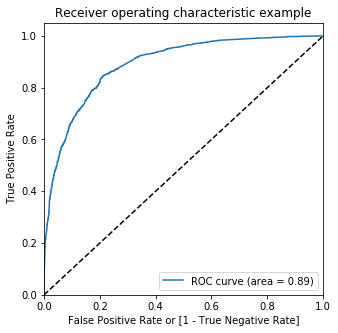

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- Observation:
- We are getting a good ROC curve which is away from the 45 degree line and area under curve value is also 0.89 which indicates our model is a descent one    

### Step 11: Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0695,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.0962,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.2243,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.7442,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.7211,7987,1,1,1,1,1,1,1,1,1,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000    0.3851 1.0000 0.0000
0.1000 0.1000    0.6279 0.9771 0.4092
0.2000 0.2000    0.7599 0.9223 0.6581
0.3000 0.3000    0.8093 0.8483 0.7849
0.4000 0.4000    0.8134 0.7817 0.8333
0.5000 0.5000    0.8128 0.6995 0.8837
0.6000 0.6000    0.8048 0.6280 0.9155
0.7000 0.7000    0.7866 0.5298 0.9475
0.8000 0.8000    0.7657 0.4419 0.9685
0.9000 0.9000    0.7188 0.2915 0.9864


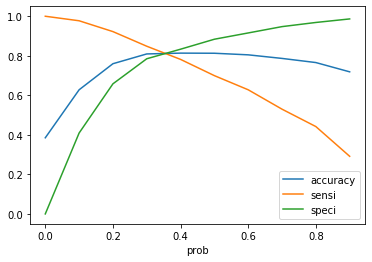

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, > 0.3 is the optimum point to take it as a cutoff probability.

In [138]:

# Creating new column 'predicted_leadscore' with 1 if Converted_Prob > 0.3 else 0
y_train_pred_final['predicted_leadscore'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()




,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore
0,0,0.0695,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.0962,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.2243,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.7442,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.7211,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_leadscore)



0.8093213667139033

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_leadscore )
confusion2

array([[3065,  840],
       [ 371, 2075]], dtype=int64)

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.848323793949305

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.7848911651728553

In [143]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21510883482714468


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7118353344768439


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8920256111757858


## Precision and Recall

##### Precision
TP / TP + FP

In [146]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7118353344768439

##### Recall
TP / TP + FN

In [147]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.848323793949305

In [148]:
#Recall
Recall=TP/float(TP+FN)
Recall

0.848323793949305

In [149]:
#Precision
Precision=TP/float(TP+FP)
Precision

0.7118353344768439

In [150]:
#Calculating the F1 score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7741093079649319

Using sklearn utilities for the same

In [151]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7118353344768439

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.848323793949305

### Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

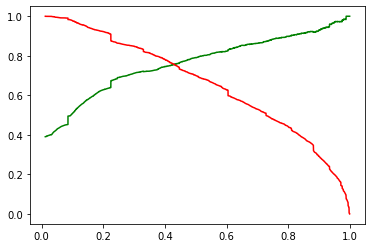

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- From the above graph , we see that the threshold appears to be at point > 0.4

In [156]:
# Creating new column 'final_predicted' with 1 if Converted_Prob > 0.4 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,final_predicted
0,0,0.0695,3009,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0962,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.2243,9226,0,1,1,1,0,0,0,0,0,0,0,0,0
3,1,0.7442,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.7211,7987,1,1,1,1,1,1,1,1,1,0,0,1,1


In [157]:
#lets check the accuracy 
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8134152102031176

In [158]:
#after having a cutoff of 0.2 the confusion matric
confusion3=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion)

[[3065  840]
 [ 371 2075]]


In [159]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [160]:
#approx sensitivity of the model 
#lets see the sensitivity of our logistic model
TP/float(TP+FN)

0.7816843826655765

#### If we choose a threshold of 0.4 we see a drop in sensitivity value. As our business problem requires a higher sensitivity in the model , so we will go with the value of 0.3 which we derived from the ROC

### Step 12: Making predictions on the test set

In [161]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [162]:
X_test = X_test[col4]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,-0.6006,0,0,0,0,1,0,0,0,0,0,0,0,0
1490,0,1.8873,1,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,-0.7529,0,0,0,0,1,0,0,0,0,0,0,0,0
4216,0,-0.8887,0,0,1,0,0,0,1,0,0,0,0,0,0
3830,0,-0.5878,1,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [164]:
y_test_pred = res.predict(X_test_sm)

In [165]:
y_test_pred[:10]

3271   0.0429
1490   0.9605
7936   0.0365
4216   0.8934
3830   0.0444
1800   0.5677
6507   0.4159
4821   0.2927
4223   0.9341
4714   0.0852
dtype: float64

In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [167]:
# Let's see the head
y_pred_1.head()

,0
3271,0.0429
1490,0.9605
7936,0.0365
4216,0.8934
3830,0.0444


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [172]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.0429
1,1,1490,0.9605
2,0,7936,0.0365
3,1,4216,0.8934
4,0,3830,0.0444


In [173]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [174]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,3271,0.0429
1,1,1490,0.9605
2,0,7936,0.0365
3,1,4216,0.8934
4,0,3830,0.0444


In [175]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [176]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,3271,0.0429,0
1,1,1490,0.9605,1
2,0,7936,0.0365,0
3,1,4216,0.8934,1
4,0,3830,0.0444,0


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8024237972824091

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  371],
       [ 167,  822]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8311425682507584

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.7860438292964245

In [182]:
# Precision = TP / TP + FP
Precision=TP / (TP + FP)
Precision

0.6890192791282481

In [183]:
#Recall
Recall=TP/float(TP+FN)
Recall

0.8311425682507584

In [184]:
# Calculating the F1 score
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7534372135655362

### Step 13: Calculating Lead score for the entire dataset

In [185]:
#select relevant columns from  y_train_pred_final
lead_score_train_pred=y_train_pred_final[['Converted','Lead Number','Converted_Prob','final_predicted']]
lead_score_train_pred.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,3009,0.0695,0
1,0,1012,0.0962,0
2,0,9226,0.2243,0
3,1,4750,0.7442,1
4,1,7987,0.7211,1


In [186]:
#merge the train and test dataframe
df_merged_leads = y_train_pred_final.append(lead_score_train_pred)
df_merged_leads.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,final_predicted
0,0,0.0695,3009,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
1,0,0.0962,1012,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
2,0,0.2243,9226,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
3,1,0.7442,4750,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1
4,1,0.7211,7987,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1


In [187]:
# multiplying the probability with 100 to find the score
df_merged_leads['Lead_Score'] = df_merged_leads['Converted_Prob'].apply(lambda x : round(x*100))
df_merged_leads.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,final_predicted,Lead_Score
0,0,0.0695,3009,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,7
1,0,0.0962,1012,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,10
2,0,0.2243,9226,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,22
3,1,0.7442,4750,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1,74
4,1,0.7211,7987,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1,72


In [188]:
df_merged_leads.sort_values(by='Lead_Score', ascending=False)


,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted_leadscore,final_predicted,Lead_Score
1247,1,0.9977,3069,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,100
2321,1,0.9977,2665,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,100
1422,1,0.9955,7736,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,100
2770,1,0.9977,3321,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,100
4887,1,0.9965,1614,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0.0038,2588,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0
2274,0,0.0036,5381,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0
2274,0,0.0036,5381,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
3913,0,0.0032,2454,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0


#### The df df_merged_leads will give the hot leads. Lead Number will help to uniqely identify each of the leads and various columns

### Finding the top features

In [189]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.72
Total Time Spent on Website                             1.11
Lead Origin_Landing Page Submission                    -1.00
Lead Source_Olark Chat                                  1.05
Lead Source_Reference                                   3.27
Lead Source_Welingak Website                            5.81
Specialization_Others                                  -1.03
What is your current occupation_Other                   2.29
What is your current occupation_Student                 1.25
What is your current occupation_Unemployed              1.13
What is your current occupation_Working Professional    3.52
Last Notable Activity_Had a Phone Conversation          3.56
Last Notable Activity_SMS Sent                          1.67
Last Notable Activity_Unreachable                       2.08
Last Notable Activity_Unsubscribed                      1.74
dtype: float64

- From above we see that , the top features with highest coefficient values are -Lead Source_Welingak Website, Last Notable Activity_Had a Phone Conversation,What is your current occupation_Working Professional, Lead Source_Reference,Last Notable Activity_Unreachable


Conclusion:

We have successfully built a Logistic Regression Model with below Evaluation scores:

Train Set:
- sensitivity	84%
- specificity  78%
- Accuracy     80%

Test Set:
- sensitivity	83%
- specificity  78%
- Accuracy     80%

### Inferences
- In Order to increase the lead conversion rate ,the sales team can follow up with customers who were reached out by phone call as the last activity.
- Customers who belong to the working Professional as their current occupation
- Concentrate on customers for whom the lead source was Welingak Website
- Customers for whom the lead source was reference
- If Customers opt for 'Do not email' as Yes , then their conversion rate is low , as they do not want to be reached out via email, so the possibility of conversion is low

In combination with the lead score and above mentioned columns , the conversation rate for X education company can be increased.